# Raditya Fahritama - Final Exam


### Problem Statement
the problem states to answer following questions:

Question 1: Data Understanding
Explore the basic information of the datasets. 

Question 2: Data Cleaning and Preprocessing
Clean and preprocess the datasets (such as missing values, outliers, dummy, merging etc.). 

Question 3: Model Generation and Evaluation
Please split the data into train and test sets with a ratio of 0.7:0.3. Build and optimize classification models you learned in this course. 

Question 4: Which model has the best performance? What have you learned from the models you built?

###### context:
A website sent advertisements by emails to users who were interested in their product. the task is to find a good model to predict if an advertisement will be clicked with given data sets. 


###### input:
- user_features.csv  = features describing our users
- product_features.csv = features describing products shown in the advertisements. 
- click_history.csv = contains which products users had previously seen and whether that user ordered products in this website before.


###### output:
- EDA of data
- Models and Evaluation on the dataset by various models

### Solution Design
**Data Preparation**
1. create EDA of data 
2. check missing values on the data. if found, fill it with appropriate value
3. check outlier of data. if found, fill with mean of the column
4. encode the column that contains list
5. after the preparation steps are done, merge all of the datasets by appropriate column. 
6. encode the categorical columns and drop some of columns that are useless for the prediction. 
7. check the class distribution ratio. if not balanced, perform upsampling for minority class. 
8. check correlation of the columns. 

**Data Modeling**
1. split the data 70/30 
2. normalize the data
3. create the confusion matrix and classification report for evaluation
4. define some of the functions
5. perform cross validation for the parameter
6. fit the data to the models
7. evaluate the models in term of accuracy, classification report, and confusion matrix
8. compare all models in ROC AUC Curve

**Models that I use for this Exam:**
- Random Forest
- Adaboost
- Decision Tree
- Artificial Neural Network

*disclaimer : I am aware that we have to use classification models that we learned from this course. I was about to use SVM. but the validation and training process took so long on my machine. So, I decided to change the classifier. In this Exam, my objective is to compare two ensemble models (Random Forest and Adaboost), Decision Tree, plus Artificial Neural Network to see which of these models perform best to solve this problem.*

###### assumption:
Everything goes well and is done and finished as required


### Code

In [207]:
#!/usr/bin/ python3

"""this code section is to load the data"""

import pandas as pd
pd.options.mode.chained_assignment = None 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OneHotEncoder, LabelBinarizer
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score  

#import the csv file
df1 = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/final exam/click_history.csv")
df2 = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/final exam/product_features.csv")
df3 = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/final exam/user_features-1.csv")

categories = ['False','True']

In [208]:
"""this code section is to see and preprocess the first dataset"""
#get snapshot of the first data
df1.head()

,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


<AxesSubplot:xlabel='clicked', ylabel='count'>

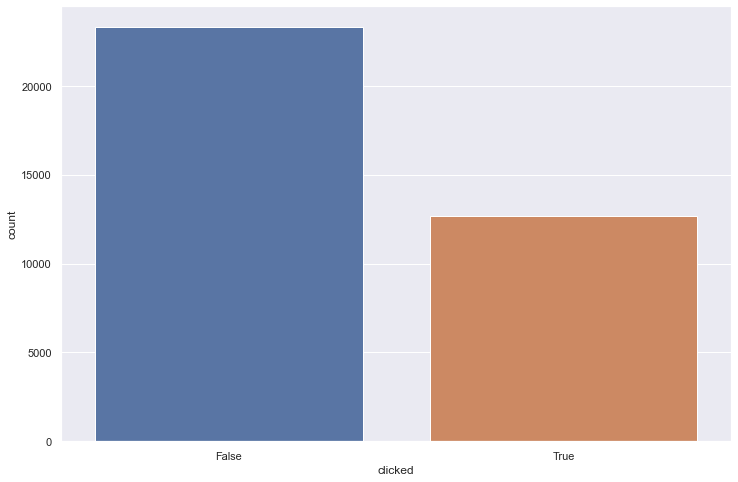

In [209]:
#plot the target variable to check data imbalance
sns.countplot(x=df1["clicked"])

We can see that the classification is not balanced at all. almost half in difference on the minority class. I will balance the data later.

In [210]:
#define categories of the target variable
categories = ['False','True']

In [211]:
#check the missing values in the data
df1.isnull().sum()

user_id       0
product_id    0
clicked       0
dtype: int64

No missing values found. so, we are good here. next, we are moving on to second data. 

In [212]:
"""this code section is to see and preprocess the second dataset"""
#get snapshot of the second data
df2.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


In [213]:
#see the categories contained in the data
df2['category'].drop_duplicates()

0             tools
1          skincare
2         fragrance
3              hair
4              body
5              foot
7              nail
8            makeup
11     men_skincare
12             hand
20    men_fragrance
Name: category, dtype: object

we can see that there are 11 categories in the data. the categories seem to be related to beauty product.

In [214]:
#check the missing values
df2.isnull().sum()

product_id           0
category             0
on_sale              0
number_of_reviews    0
avg_review_score     0
dtype: int64

No missing values found. again, we are good here. 

<AxesSubplot:xlabel='avg_review_score'>

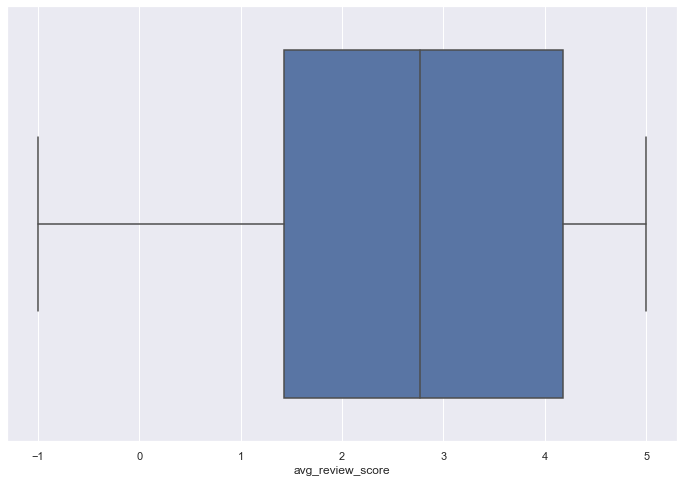

In [215]:
#check outlier on review score
sns.boxplot(x=df2['avg_review_score'])

we can see that there is no outlier for this column. all of the data points were located within the range of the boxplot. we move on to next column. 

<AxesSubplot:xlabel='number_of_reviews'>

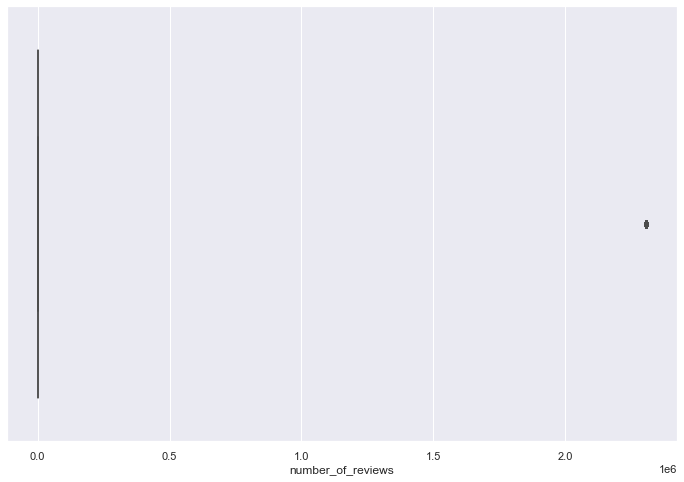

In [216]:
#check outlier on number review
sns.boxplot(x=df2['number_of_reviews'])

we can see there is one data point that stands out far beyond the boxplot. as the boxplot presented as only a line. we will normalize this datapoint.

<AxesSubplot:xlabel='number_of_reviews'>

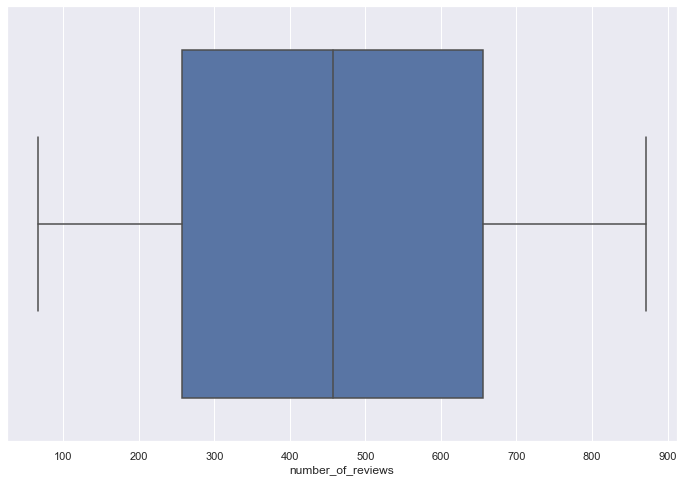

In [217]:
"""this part is to normalize the outlier found in the data"""

#get the column with outlier
outdf = df2['number_of_reviews']

#set the quartile and IQR
Q1 = outdf.quantile(0.25)
Q3 = outdf.quantile(0.75)
IQR = Q3 - Q1

#set the datapoint which located beyond the quartile bound to NaN
outdf[(outdf < (Q1 - 1.5 * IQR)) |(outdf > (Q3 + 1.5 * IQR))] = np.NaN   

#fill the NaN with mean of the column
outdf.fillna(outdf.mean(), inplace=True)

#set the column back to original dataframe
df2['number_of_reviews'] = outdf

#check the boxplot again
sns.boxplot(x=df2['number_of_reviews'])

we can see that the boxplot is now in normal state. and all datapoints are located within the range of the boxplot. we move on to third data. 

In [218]:
"""this code section is to see and preprocess the second dataset"""
#get snapshot of third dataset 
df3.head()

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'me..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'sk..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_sk..."


we can see that there is column that contains list. we have to break it down and encode each of the content. 

In [219]:
#check missing values
df3.isnull().sum()

user_id                      0
number_of_clicks_before    500
ordered_before               0
personal_interests           0
dtype: int64

we can see that there are 500 missing values for number of clicks. for this matter, I will just simply put 0 in the missing values. as i assume that unknown number of clicks is equal to 0. 

In [220]:
#fill the NaN with 0
df3 = df3.fillna("0")

In [221]:
"""this part is to breakdown the list in the personal interest column"""

#strip the values from string to readable list
for i in range(len(df3)):
    df3['personal_interests'][i] = df3['personal_interests'][i].strip('][').split(', ')

#assign multilabelbinarizer
mlb = MultiLabelBinarizer()

#join the encoded column to main dataset. and pop the original column.
df3 = df3.join(pd.DataFrame(mlb.fit_transform(df3.pop('personal_interests')),
                          columns=mlb.classes_,
                          index=df3.index))

#rename the list that contains nothing to no interest column
df3 = df3.rename(columns={"": "no_interest"})

df3

,user_id,number_of_clicks_before,ordered_before,no_interest,'body','foot','fragrance','hair','hand','makeup','men_fragrance','men_skincare','nail','skincare','tools'
0,104939,2,True,0,1,1,1,1,1,1,1,0,1,0,1
1,101562,2,True,0,1,0,0,0,0,1,1,1,1,1,1
2,102343,2,True,0,0,1,0,0,0,1,0,0,1,0,1
3,106728,5,True,0,0,0,0,0,1,0,0,1,0,0,0
4,107179,0,True,0,1,1,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,105121,6+,True,0,0,1,1,1,1,1,1,1,1,1,0
11996,102607,1,False,0,1,0,1,0,0,1,1,1,1,0,1
11997,106873,2,False,0,1,0,0,1,1,1,1,1,0,1,1
11998,107769,0,True,0,0,0,1,1,1,1,0,1,1,0,1


we can see that the third data is now looking good. as the list are all broken down to individual columns. 

In [222]:
"""this section is to get the final dataframe and perform last data preprocessing"""

#merge all of the dataframe
df = pd.merge(df1, df3, on='user_id', how='inner')
df = pd.merge(df, df2, on='product_id', how='inner')

#drop some of unused columns
df = df.drop(['user_id','product_id'], axis = 1)

#encode boolean to 0/1
df["clicked"] = df["clicked"].astype(int)
df["ordered_before"] = df["ordered_before"].astype(int)
df["on_sale"] = df["on_sale"].astype(int)

#encode categorical data to numeric form
le = LabelEncoder()

le.fit(df['category'])
df['category'] = le.transform(df['category']) + 1
le.fit(df['number_of_clicks_before'])
df['number_of_clicks_before'] = le.transform(df['number_of_clicks_before']) + 1

df

,clicked,number_of_clicks_before,ordered_before,no_interest,'body','foot','fragrance','hair','hand','makeup','men_fragrance','men_skincare','nail','skincare','tools',category,on_sale,number_of_reviews,avg_review_score
0,0,3,1,0,1,0,0,1,0,0,0,0,0,0,0,9,0,136.0,2.653361
1,0,3,1,0,1,0,1,0,1,1,1,1,0,0,1,9,0,136.0,2.653361
2,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,9,0,136.0,2.653361
3,0,5,1,0,0,1,1,1,0,0,0,0,0,1,0,9,0,136.0,2.653361
4,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,9,0,136.0,2.653361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35985,0,6,1,0,0,0,0,0,0,0,0,0,1,0,0,10,0,220.0,0.317338
35986,0,2,1,0,1,1,0,0,0,0,1,0,0,0,1,10,0,220.0,0.317338
35987,0,3,1,0,0,0,1,0,0,0,0,0,1,0,1,10,0,220.0,0.317338
35988,0,5,0,0,0,0,1,0,1,1,1,1,1,0,1,10,0,220.0,0.317338


we can see that the final data looks nice and looks ready to be used for next steps. 

In [223]:
#check the missing values in final dataframe. just to make sure. 
df.isnull().sum()

clicked                    0
number_of_clicks_before    0
ordered_before             0
no_interest                0
'body'                     0
'foot'                     0
'fragrance'                0
'hair'                     0
'hand'                     0
'makeup'                   0
'men_fragrance'            0
'men_skincare'             0
'nail'                     0
'skincare'                 0
'tools'                    0
category                   0
on_sale                    0
number_of_reviews          0
avg_review_score           0
dtype: int64

No missing values on the final dataframe

In [224]:
#getting numeric description of data
df.describe()

,clicked,number_of_clicks_before,ordered_before,no_interest,'body','foot','fragrance','hair','hand','makeup','men_fragrance','men_skincare','nail','skincare','tools',category,on_sale,number_of_reviews,avg_review_score
count,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000,35990.000000
mean,0.352542,3.780634,0.703529,0.089747,0.453709,0.454126,0.456682,0.451375,0.441039,0.456016,0.443707,0.451014,0.447791,0.449819,0.448124,5.592220,0.650542,456.469483,2.650815
std,0.477768,2.173816,0.456708,0.285823,0.497859,0.497898,0.498127,0.497637,0.496518,0.498069,0.496828,0.497602,0.497274,0.497482,0.497309,3.008289,0.476805,228.412047,1.736823
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,66.000000,-1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,257.000000,1.430110
50%,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,457.148421,2.761251
75%,1.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,655.000000,4.165674
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,872.000000,5.000000


we can see that the standard deviation for number of reviews column is pretty high compared to the mean of the data. we will investigate this column. 

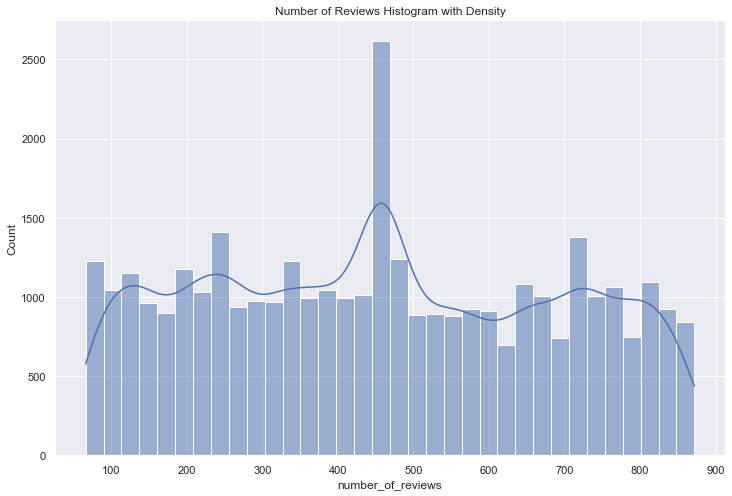

In [226]:
#create histogram for the number of reviews
sns.histplot(data=df, x="number_of_reviews", kde=True)
plt.title('Number of Reviews Histogram with Density')
plt.show()

we can see that the distribution for this column is  approximately unifrom. as the plot tend to be flat. with the central data points being the highest in number. we can conclude that the distribution is not so normal. 

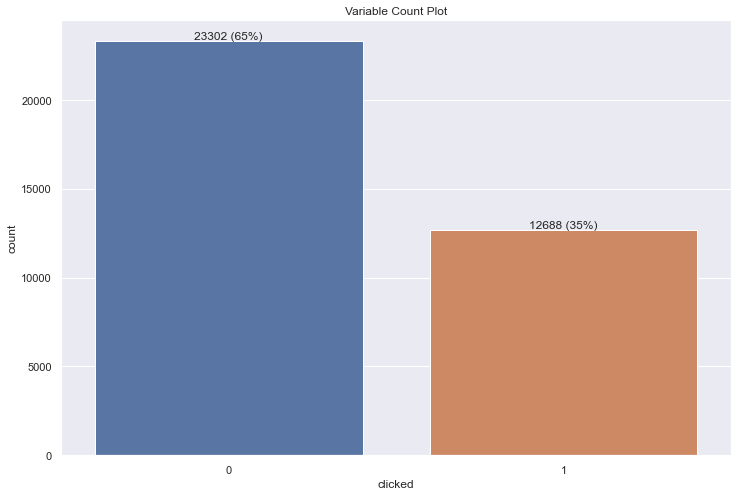

In [205]:
"""this function is to get the countplot of the target variable"""
def countplot(nn):
    sns.set(rc={'figure.figsize':(12,8)})

    ax = sns.countplot(x=nn,
                       order=nn.value_counts(ascending=False).index)

    abs_values = nn.value_counts(ascending=False)
    rel_values = nn.value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.title("Variable Count Plot")
    plt.show()
    
countplot(df['clicked'])

we can see as previously mentioned, the sample for the target variable is not balanced. data upsampling will be performed. 

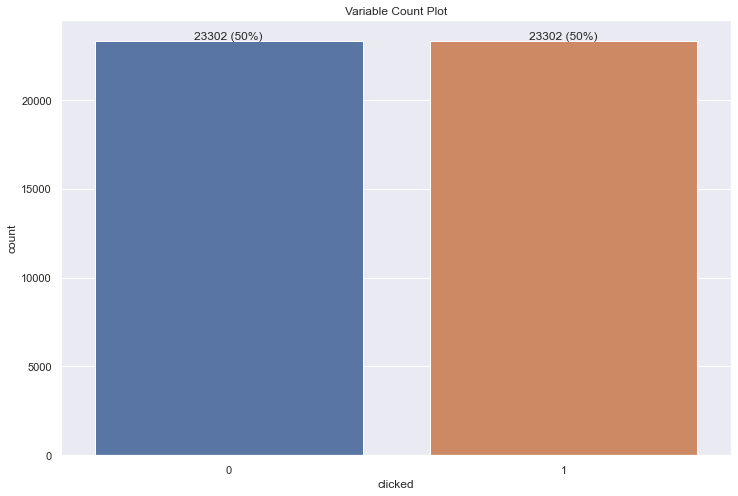

In [260]:
"""this section is to balance target variable"""
from sklearn.utils import resample

#assign major and minor class
df_majority = df[df.clicked== False]
df_minority = df[df.clicked== True]

#apply random resample based on major class count
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=len(df_majority),    
                                 random_state=123) 

#concat the result into df
df = pd.concat([df_majority, df_minority_upsampled])
df = df.reset_index(drop = True)
countplot(df['clicked'])

we can see that now the data is balanced in count

In [261]:
#check the correlation in dataframe
dfcorr = df.corr()
dfcorr.style.background_gradient(cmap='YlOrRd')
#dataplot = sns.heatmap(dfcorr, cmap="YlOrRd", annot=True)

,clicked,number_of_clicks_before,ordered_before,no_interest,'body','foot','fragrance','hair','hand','makeup','men_fragrance','men_skincare','nail','skincare','tools',category,on_sale,number_of_reviews,avg_review_score
clicked,1.000000,0.012884,0.140605,-0.083950,0.018792,0.015771,0.024592,0.011556,0.028755,0.019382,0.020644,0.026075,0.040109,0.014489,0.037700,-0.058513,0.125878,-0.166925,-0.048318
number_of_clicks_before,0.012884,1.000000,0.012180,-0.012441,0.003686,-0.002607,-0.003294,0.000954,-0.005429,-0.002352,-0.002416,0.001625,0.011917,-0.008926,0.002509,0.001897,0.000283,-0.010401,-0.002236
ordered_before,0.140605,0.012180,1.000000,-0.006195,0.008251,0.010677,0.008267,0.010080,0.005748,-0.006158,0.007719,0.002228,0.015361,-0.000988,0.016195,-0.001661,-0.001719,-0.007081,-0.005637
no_interest,-0.083950,-0.012441,-0.006195,1.000000,-0.274619,-0.275357,-0.276945,-0.273337,-0.269944,-0.276813,-0.269288,-0.274678,-0.275989,-0.273124,-0.275631,-0.007157,0.002464,0.007541,-0.000684
'body',0.018792,0.003686,0.008251,-0.274619,1.000000,0.249151,0.259985,0.268821,0.266450,0.252208,0.265342,0.251446,0.239838,0.240185,0.243466,0.003749,-0.004496,0.001027,0.000623
'foot',0.015771,-0.002607,0.010677,-0.275357,0.249151,1.000000,0.280645,0.235765,0.240928,0.243897,0.260201,0.225061,0.231276,0.237272,0.251000,0.000432,0.004433,-0.003487,0.010414
'fragrance',0.024592,-0.003294,0.008267,-0.276945,0.259985,0.280645,1.000000,0.253128,0.245296,0.254680,0.247585,0.252515,0.261887,0.247629,0.257830,-0.003989,-0.000301,0.000410,0.011479
'hair',0.011556,0.000954,0.010080,-0.273337,0.268821,0.235765,0.253128,1.000000,0.251651,0.234699,0.266062,0.253290,0.271999,0.248325,0.247747,0.005149,0.016741,-0.003940,0.016819
'hand',0.028755,-0.005429,0.005748,-0.269944,0.266450,0.240928,0.245296,0.251651,1.000000,0.254050,0.259007,0.234424,0.265880,0.267724,0.255191,0.004444,0.004227,-0.009690,-0.002669
'makeup',0.019382,-0.002352,-0.006158,-0.276813,0.252208,0.243897,0.254680,0.234699,0.254050,1.000000,0.251052,0.239201,0.250571,0.244346,0.253690,0.000627,0.010517,-0.003205,0.011344


we can see that the correlations for all columns are towards 0. we can see that there's no correlation that is close to 1 or -1. so, we can conclude that the correlation is good in the data. 

In [245]:
#import modeling module

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

In [264]:
#split the data to train and test with 70/30 ratio

x_train, x_test, y_train, y_test = train_test_split(df.drop(['clicked'], axis=1), 
                                                    df['clicked'],
                                                    test_size = 0.3,
                                                    shuffle =True,random_state =42)

In [265]:
#assign scaler for train data
ss = StandardScaler()

#assign different train set for scaled data
x_train= pd.DataFrame(ss.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(ss.fit_transform(x_test), columns = x_train.columns)

In [266]:
"""this function is to tune the parameter with randomized search cross validation"""

def partuning(x):
    rscv_fit = x.fit(x_train, y_train)
    best_parameters = rscv_fit.best_params_
    best_estimator = rscv_fit.best_estimator_
    print(best_parameters)
    print(best_estimator)

In [267]:
"""this function is to display confusion matrix"""

def confmat(cm):
    ax = sns.heatmap(cm, annot=True, cmap='YlOrBr', fmt='g')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(categories)
    ax.yaxis.set_ticklabels(categories)

    plt.show()

In [268]:
"""this function is to display evaluation of classification"""

def simpleeval(x,y,m):
    pred = m.predict(x)
    score=accuracy_score(y,pred)
    print('Accuracy : %.5f'%score)
    print(classification_report(y, pred, target_names = categories))

# Adaboost Approach

In [269]:
#assign classifier
abt = AdaBoostClassifier()

#assign tuning parameter
grid_ab = {
    "n_estimators":[5,50,250,500],
    "learning_rate":[0.01,0.1,1,10,100]
}

#assign RandomizedSearch cross validation with 5 iteration
rscv = RandomizedSearchCV(estimator = abt, 
                          param_distributions = grid_ab, 
                          cv = 5, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=5)

In [270]:
#call the function
partuning(rscv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 500, 'learning_rate': 0.1}
AdaBoostClassifier(learning_rate=0.1, n_estimators=500)


In [271]:
"""this part is to fit the classifier to the data with best hyperparameter"""
#assign classifier
adcl = AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
#fit the data
adcl.fit(x_train, y_train)
#print the score of classifier
print("%.2f"%adcl.score(x_test,y_test))

0.74


In [272]:
#call the fucnction for adaboost model evaluation
simpleeval(x_test,y_test,adcl)

Accuracy : 0.74188
              precision    recall  f1-score   support

       False       0.76      0.71      0.74      7058
        True       0.72      0.78      0.75      6924

    accuracy                           0.74     13982
   macro avg       0.74      0.74      0.74     13982
weighted avg       0.74      0.74      0.74     13982



we can see that the accuracy is not so good but not so bad also. with 74% accuracy. and 74% in macro average F1 score. we can conclude that this model is decent enough. 

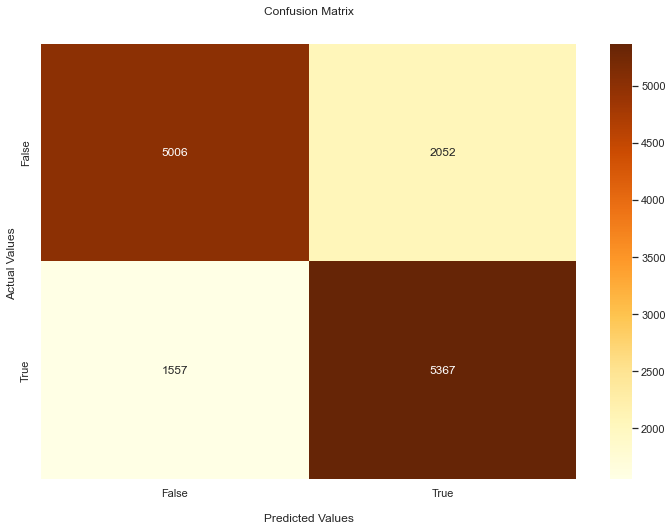

In [273]:
#call the confusion matrix function 
pred = adcl.predict(x_test) 
confm = confusion_matrix(y_test,pred)
confmat(confm)

we can see that the error is more on the false negative side. in this case, our model predicted true class as false class more than vise versa. that's why the recall for false class is the lowest. 

# Random Forest Approach

In [274]:
#assign classifier
rft = RandomForestClassifier()

#assign tuning parameter
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

#assign RandomizedSearch cross validation with 5 iteration
rscv = RandomizedSearchCV(estimator = rft, 
                          param_distributions = grid_rf, 
                          cv = 5, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter= 5)

In [275]:
#call the function
partuning(rscv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'random_state': 30, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_depth': 13, 'bootstrap': True}
RandomForestClassifier(max_depth=13, min_samples_leaf=7, n_estimators=500,
                       random_state=30)


In [276]:
"""this part is to fit the classifier to the data with best hyperparameter"""
#assign classifier
rdcl = RandomForestClassifier(max_depth=13, min_samples_leaf=7, n_estimators=500,
                       random_state=30)
#fit the data
rdcl.fit(x_train, y_train)
#print the score of classifier
print("%.2f"%rdcl.score(x_test,y_test))

0.78


In [277]:
#call the fucnction for random forest model evaluation
simpleeval(x_test,y_test,rdcl)

Accuracy : 0.78401
              precision    recall  f1-score   support

       False       0.83      0.72      0.77      7058
        True       0.75      0.85      0.80      6924

    accuracy                           0.78     13982
   macro avg       0.79      0.78      0.78     13982
weighted avg       0.79      0.78      0.78     13982



we can see that, compared to adaboost, eventhough the accuracy is higher for 4%, the recall for false class is lower by 1%. meaning that the model predict false negative more than the adaboost model. 

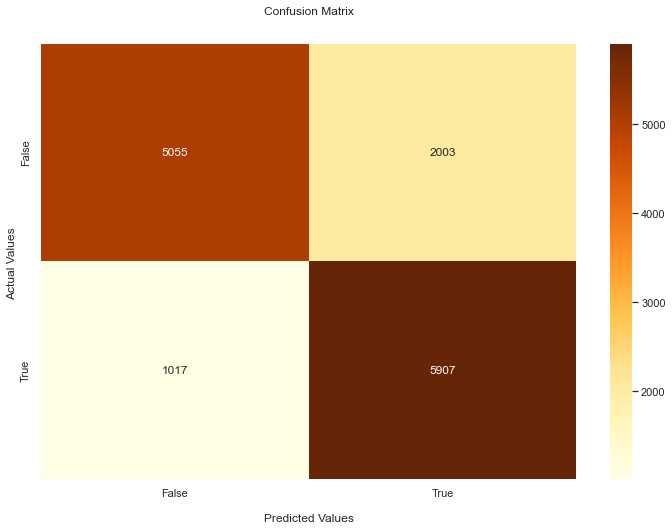

In [278]:
#call the confusion matrix function 
pred = rdcl.predict(x_test) 
confm = confusion_matrix(y_test,pred)
confmat(confm)

as the classification report states. we can see from the confusion matrix that the model predict more false negative class than previous model. but at the same time, the false positive prediction is much lower than the adaboost. that explain the raising accuracy for the random forest model. 

# Decision Tree Approach

In [279]:
#assign classifier
dt = DecisionTreeClassifier()

#assign tuning parameter
grid_dt = {
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int)
}

#assign RandomizedSearch cross validation with 5 iteration
rscv = RandomizedSearchCV(estimator = dt, 
                          param_distributions = grid_dt, 
                          cv = 5, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter= 5)

In [280]:
#call the function
partuning(rscv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'min_samples_split': 10, 'min_samples_leaf': 7, 'max_depth': 11}
DecisionTreeClassifier(max_depth=11, min_samples_leaf=7, min_samples_split=10)


In [281]:
"""this part is to fit the classifier to the data with best hyperparameter"""
#assign classifier
dtcl = DecisionTreeClassifier(max_depth=11, min_samples_leaf=7, min_samples_split=10)
#fit the data
dtcl.fit(x_train, y_train)
#print the score of classifier
print("%.2f"%dtcl.score(x_test,y_test))

0.75


In [282]:
#call the fucnction for decision tree model evaluation
simpleeval(x_test,y_test,dtcl)

Accuracy : 0.75261
              precision    recall  f1-score   support

       False       0.79      0.70      0.74      7058
        True       0.72      0.81      0.76      6924

    accuracy                           0.75     13982
   macro avg       0.76      0.75      0.75     13982
weighted avg       0.76      0.75      0.75     13982



we can see distinct result here. eventhough the accuracy is slightly higher from adaboost model, the scores for precision and recall are quite same for both. meaning that the performance of model prediction on true class is same as the previous models

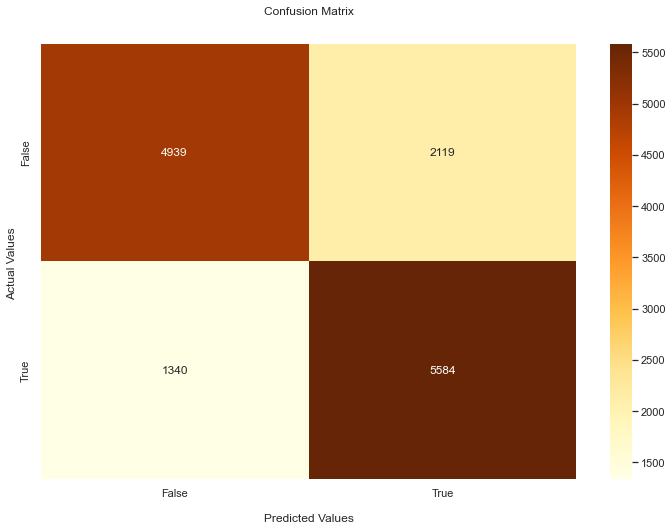

In [283]:
#call the confusion matrix function 
pred = dtcl.predict(x_test) 
confm = confusion_matrix(y_test,pred)
confmat(confm)

we can see that the model make more error in false negative side. the error on both false positive and false negative are quite the same previous models. 

# Neural Network Approach

In [284]:
#import required modules
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import np_utils

In [285]:
#reshape the y train and test to categorical encoding
YNN_train = np_utils.to_categorical(y_train, 2)
YNN_test = np_utils.to_categorical(y_test, 2)
YNN_train.shape

(32622, 2)

In [286]:
#define Multi Layer Perceptron model in keras sequential

tf.keras.backend.clear_session()
model=Sequential()
model.add(Dense(256,input_dim=18,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

#assign optimizer and compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001) 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#get the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4864      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

we can see that there are 9 layers with ~48000 trainable parameters

In [289]:
#train the neural network
train = model.fit(x_train, YNN_train, epochs=20, batch_size=64, validation_split = 0.3)

Epoch 1/20
357/357 [==============================] - 3s 7ms/step - loss: 0.6030 - accuracy: 0.6761 - val_loss: 0.5509 - val_accuracy: 0.7255
Epoch 2/20
357/357 [==============================] - 2s 6ms/step - loss: 0.5529 - accuracy: 0.7270 - val_loss: 0.5479 - val_accuracy: 0.7307
Epoch 3/20
357/357 [==============================] - 2s 5ms/step - loss: 0.5404 - accuracy: 0.7384 - val_loss: 0.5369 - val_accuracy: 0.7317
Epoch 4/20
357/357 [==============================] - 2s 6ms/step - loss: 0.5329 - accuracy: 0.7418 - val_loss: 0.5419 - val_accuracy: 0.7312
Epoch 5/20
357/357 [==============================] - 2s 6ms/step - loss: 0.5306 - accuracy: 0.7445 - val_loss: 0.5352 - val_accuracy: 0.7334
Epoch 6/20
357/357 [==============================] - 2s 7ms/step - loss: 0.5265 - accuracy: 0.7470 - val_loss: 0.5380 - val_accuracy: 0.7322
Epoch 7/20
357/357 [==============================] - 2s 7ms/step - loss: 0.5206 - accuracy: 0.7491 - val_loss: 0.5374 - val_accuracy: 0.7381
Epoch 

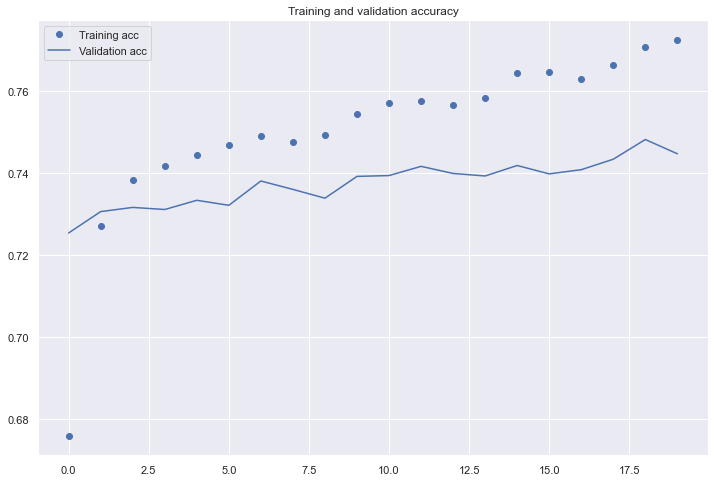

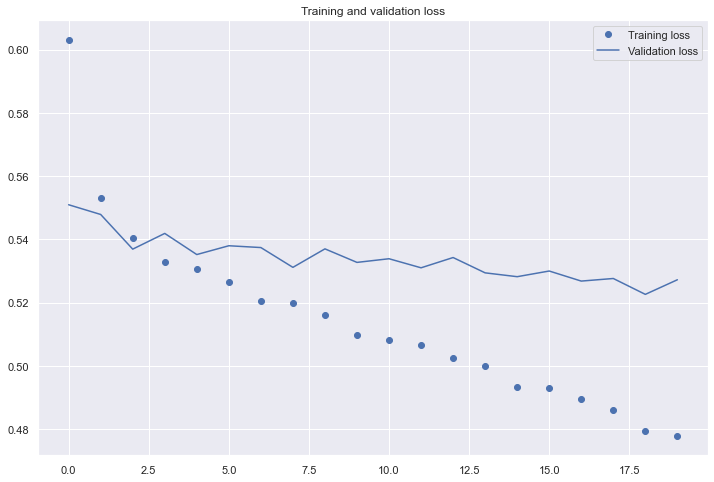

In [290]:
"""this section is to plot the accuracy and loss"""
#plotting accuracy and loss
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that the accuracies and losses for each epoch seem to be flat and stuck in ~74%. we can see that there is no significant improvement in the training process 

In [291]:
"""this section is to evaluate the neural network model"""

#get test score and accuracy
score, acc = model.evaluate(x_test, YNN_test,batch_size=32)
print('Test score: %.2f'%(score*100),'%')
print('Test accuracy: %.2f'%(acc*100),'%')

#get classification report
nnpred = model.predict(x_test)
nnpredmax = np.argmax(nnpred,axis = 1)
print(classification_report(y_test, nnpredmax, target_names = categories))

437/437 [==============================] - 1s 3ms/step - loss: 0.5253 - accuracy: 0.7422
Test score: 52.53 %
Test accuracy: 74.22 %
437/437 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

       False       0.76      0.72      0.74      7058
        True       0.73      0.77      0.75      6924

    accuracy                           0.74     13982
   macro avg       0.74      0.74      0.74     13982
weighted avg       0.74      0.74      0.74     13982



we can see that the exact accuracy of the model is 74.22% with loss score of 52.53%. our model is neither good or bad. we can also see from the classification report. that for all score, all is ~74%. we can expect that the errors that the model makes are all quite same in number. 

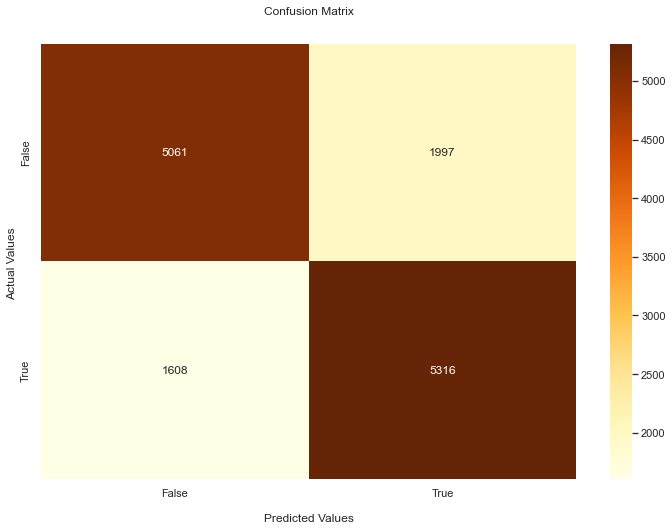

In [292]:
#get the confusion matrix
confm = confusion_matrix(y_test,nnpredmax)
confmat(confm)

we can see that the errors are more on false negative side. we can conclude that the neural network performs equally on errors from all the models that we tested. that yield more error on false negative side.

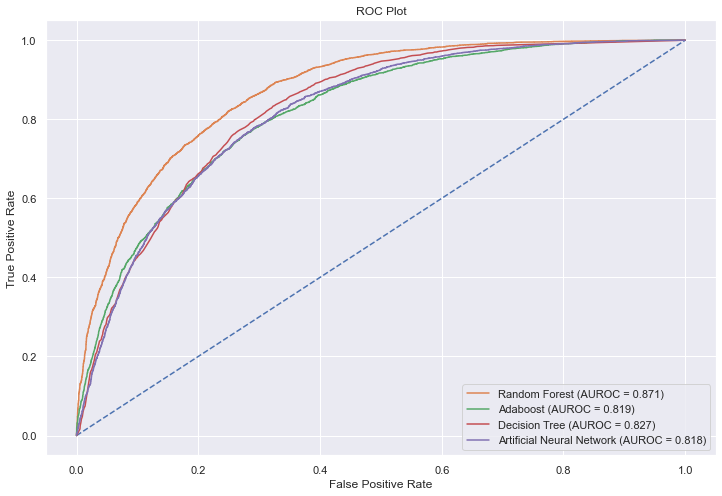

In [293]:
"""this section is to get and plot the ROC AUC"""

r_probs = [0 for _ in range(len(y_test))]
rf_probs = rdcl.predict_proba(x_test)
ad_probs = adcl.predict_proba(x_test)
dt_probs = dtcl.predict_proba(x_test)

rf_probs = rf_probs[:, 1]
ad_probs = ad_probs[:, 1]
dt_probs = dt_probs[:, 1]
nn_probs = nnpred[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
ad_auc = roc_auc_score(y_test, ad_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
nn_auc = roc_auc_score(y_test, nn_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ad_fpr, ad_tpr, _ = roc_curve(y_test, ad_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

plt.plot(r_fpr, r_tpr, linestyle='--')
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(ad_fpr, ad_tpr, linestyle='-', label='Adaboost (AUROC = %0.3f)' % ad_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(nn_fpr, nn_tpr, linestyle='-', label='Artificial Neural Network (AUROC = %0.3f)' % nn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()

we can see from the plot, the random forest model outshines all models which are adaboost, Decision Tree, and ANN model. with AUC score of 0.87. while both of adaboost and ANN AUC scores are ~0.82. and decision tree AUC is ~0.83. we can also see that the curves for adaboost and ANN model aligns almost perfectly. meaning that these two models yield results that are likely to be equal. from this plot, we can conclude that random forest gives best result. 

### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)



###### exception handling:
- no exception handling performed


### Discussion

Question 1: Data Understanding
Explore the basic information of the datasets. 

Answer: EDA has been performed.

Question 2: Data Cleaning and Preprocessing
Clean and preprocess the datasets (such as missing values, outliers, dummy, merging etc.). 

Answer: Data Cleaning has been performed.

Question 3: Model Generation and Evaluation
Please split the data into train and test sets with a ratio of 0.7:0.3. Build and optimize classification models you learned in this course. 

Answer: Data Modeling has been performed. all models are trained with 70/30 ratio

Question number 4 : Which model has the best performance? What have you learned from the models you built?

Answer: The model that give best result out of all models that i tested, apparently, is Random Forest model. the lesson that i learned is that random forest can even beat neural network when tuned correctly. 

### Conclusion

- All errors are mainly on the false negative side. meaning that the models are struggling to classify True class. 
- The accuracies for all models are likely equal. the differences are not to extreme. 
- Random Forest outshine all models with 78% accuracy and AUC score of 0.87. this conclude that for ensemble methods, random forest is better than adaboost for the data. 
- Random Forest also outshine decision tree. this means that it is better to use more trees than just relying on 1 decision tree. 
- Neural Network performed equally likely with traditional machine learning classifier. but maybe, with different architecture and technique, the accuracy can be increased higher than current accuracy. 